In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unrar x '/content/drive/MyDrive/Colab Notebooks/data.rar'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Colab Notebooks/data.rar

Extracting  track_feats.csv                                                4%  8% 13% 17% 22% 26% 31% 35% 40% 44% 49% 53% 58% 62% 67% 71% 76% 77%  OK 
Extracting  train_data_20.csv                                             82% 86% 91% 95% 98%  OK 
Extracting  test_data_20.csv                                              99%  OK 
All OK


In [3]:
import pandas as pd
pd.set_option('display.max_columns', 500)

In [4]:
def overview(df, maxvals=10, maxlen=110):
    print('Shape: ', df.shape)
    
    def pad(y):
        max_len = max([len(x) for x in y])
        return [x.ljust(max_len) for x in y]
    
    # Column Name
    toprnt = pad(df.columns.tolist())
    
    # Column Type
    toprnt = pad([toprnt[i] + ' ' + str(df.iloc[:,i].dtype) for i in range(df.shape[1])])
    
    # Num NAs
    num_nas = [df.iloc[:,i].isnull().sum() for i in range(df.shape[1])]
    num_nas_ratio = [int(round(x*100/df.shape[0])) for x in num_nas]
    num_nas_str = [str(x) + ' (' + str(y) + '%)' for x,y in zip(num_nas, num_nas_ratio)]
    max_len = max([len(x) for x in num_nas_str])
    num_nas_str = [x.rjust(max_len) for x in num_nas_str]
    toprnt = [x + ' ' + y + ' NAs' for x,y in zip(toprnt, num_nas_str)]
    
    for x in toprnt:
        print(x)

# Test set

In [10]:
test_df=pd.read_csv("/content/test_data_20.csv")
overview(test_df)

Shape:  (73960, 40)
session_id                                 object  0 (0%) NAs
session_position                           float64 0 (0%) NAs
session_length                             float64 0 (0%) NAs
track_id_clean                             object  0 (0%) NAs
skip_1                                     int64   0 (0%) NAs
skip_2                                     int64   0 (0%) NAs
skip_3                                     int64   0 (0%) NAs
not_skipped                                int64   0 (0%) NAs
context_switch                             int64   0 (0%) NAs
no_pause_before_play                       int64   0 (0%) NAs
short_pause_before_play                    int64   0 (0%) NAs
long_pause_before_play                     int64   0 (0%) NAs
hist_user_behavior_n_seekfwd               float64 0 (0%) NAs
hist_user_behavior_n_seekback              float64 0 (0%) NAs
hist_user_behavior_is_shuffle              int64   0 (0%) NAs
hour_of_day                                float64

# Track features

<font size = 4><font style = 'font-family:"Times New Roman"'>
      
- track_id: unique identifier
- duration: length of track in seconds
- release_year: estimate of year the track was released
- us_populairty_estimate: estimate of the US popularity percentile of the track as of Oct 12, 2018
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- beat_strength: ??
- bounciness: ??
- dyn_range_mean: ??
- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- flatness: ??
- instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation (https://en.wikipedia.org/wiki/Pitch_class). E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 
- mechanism: ??
- mode: Model indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. 
- organism: ??
- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 
- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
- time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 
- See https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/
- acoustic_vector_*: See http://benanne.github.io/2014/08/05/spotify-cnns.html and http://papers.nips.cc/paper/5004-deep-content-based-


In [6]:
track_features = pd.read_csv("/content/track_feats.csv")

In [7]:
track_features.head().T

,0,1,2,3,4
track_id,t_7f435320-5d3b-497d-9346-0c97429af2b9,t_2a7b6393-ebec-4e1f-a53f-2ad842532c99,t_949441c4-4920-4eed-b929-2d67d37b7bd9,t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,t_a0747d21-6042-4af7-a21d-aa7cd1a8094e
duration,3.8661,1.51297,-1.33228,-0.712162,-1.62947
release_year,0.441176,0.308824,0.485294,0.485294,0.573529
us_popularity_estimate,-0.403765,0.314153,0.00103198,0.558944,-0.356946
acousticness,0.0758464,0.0854823,0.00227411,0.00502361,0.962717
beat_strength,0.499848,0.450139,0.243778,0.33858,0.130125
bounciness,0.494943,0.457034,0.229295,0.331703,0.0923348
danceability,0.461215,0.663219,0.290262,0.348846,0.170027
dyn_range_mean,-0.208611,-0.30501,-1.1819,-0.795663,-2.02421
energy,0.563252,0.767307,0.958647,0.886674,0.0056736


# Training set - session logs

| Column name | Column description | Example value|
| :---: | :---: | :---: |
session id | unique session identifier | 57 _55129e3f-29bf-4ef6-aa72-d140333eac9c
session position | position of track within session | 18
session length | length of session |20
track id | unique track identifier | t _aae12819-de17-4dd3-97b0-cad4dd7b9a56
skip 1 | whether the track was only played very briefly | false
skip 2 | whether the track was only played briefly | false
skip 3 | whether most of the track was played | true
not skipped |  whether the track was played in its entirety | false
context switch|  whether the user changed context between the previous row and the current row | true
no pause | whether there was no pause between playback of the previous track and current track | false
short pause | whether there was a short pause between playback of the previous track and current track | true
long pause | whether there was a long pause between playback of the previous track and current track | true
num seekfwd | the number of times the user scrubbed forward during playback | 0
num seekbk | the number of times the user scrubbed backward during playback | 3
shuffle | whether the track was played with shuffle mode activated | false
hour of day | hour of day (integers between 0 and 23) | 18
date| date in YYYY-MM-DD format|  2018-09-10
premium|  whether the user was on premium or not | true
context type | what type of context the playback occurred within | catalog
reason start | cause of this track play starting | forward button
reason end | cause of this track play ending | track done
uniform random | whether shuffle would be uniformly random for this session | false

- session_id: unique identifier for the session that this row is a part of
- session_position: {1-20} - position of row within the session
- session_length: {10-20} - number of rows in session
- track_id_clean: unique identifier for the track played. This is linked with track_id in the track features and metadata table.
- skip_1: Boolean indicating if the track was only played very briefly
- skip_2: Boolean indicating if the track was only played briefly
- skip_3: Boolean indicating if most of track was played
- not_skipped: Boolean indicating that the track was played in its entirety
- context_switch: Boolean indicating if the user changed context between previous row and the current row. This could for example occur if the user switched from one playlist to another.
- no_pause_before_play: Boolean indicating if there was no pause between playback of the previous track and this track.
- short_pause_before_play: Boolean indicating if there was a short pause between playback of the previous track and this track
- long_pause_before_play: Boolean indicating if there was a long pause between playback of the previous track and this track
- hist_user_behavior_n_seekfwd: Number of times the user did a seek forward within track
- hist_user_behavior_n_seekback: Number of times the user did a seek back within track
- hist_user_behavior_is_shuffle: Boolean indicating if the user encountered this track while shuffle mode was activated
- hour_of_day: {0-23} - The hour of the day
- date
- premium: Boolean indicating if the user was on premium or not. This has potential implications for skipping behavior.
- context_type: E.g. editorial playlist - what type of context the playback occurred within
- hist_user_behavior_reason_start: E.g. fwdbtn - the user action which led to the current track being played
- hist_user_behavior_reason_end: E.g. trackdone - the user action which led to the current track playback ending


In [8]:
training_set = pd.read_csv("/content/train_data_20.csv")

In [11]:
whole_data=pd.concat([training_set,test_df])

In [12]:
whole_data_merged=whole_data.merge(track_features,left_on='track_id_clean', right_on='track_id',suffixes=('_left', '_right'))

In [13]:
training_set.tail()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
1181555,63_def0e3d9-617d-4e26-b2d8-a9d196e40d1d,0.789474,1.0,t_65195b25-f1aa-40e2-84e8-f0c6bca56518,0,0,0,1,0,1,0,0,-0.164915,-0.165319,0,0.956522,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1181556,63_def0e3d9-617d-4e26-b2d8-a9d196e40d1d,0.842105,1.0,t_9efc7cd8-75dc-4fe4-84d5-52dcf4d0542d,0,0,0,1,0,1,0,0,-0.164915,-0.165319,0,0.956522,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1181557,63_def0e3d9-617d-4e26-b2d8-a9d196e40d1d,0.894737,1.0,t_b0dd6de2-ce73-4087-a325-d7d95fce2ba1,0,0,0,1,0,1,0,0,-0.164915,-0.165319,0,0.956522,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1181558,63_def0e3d9-617d-4e26-b2d8-a9d196e40d1d,0.947368,1.0,t_9cf7676c-3ef3-430b-835d-194cb7bdfdc1,0,0,0,1,0,1,0,0,-0.164915,-0.165319,0,0.956522,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1181559,63_def0e3d9-617d-4e26-b2d8-a9d196e40d1d,1.000000,1.0,t_530b10b4-5412-4033-88bf-39aad0593c9b,0,0,0,1,0,1,0,0,-0.164915,-0.165319,0,0.956522,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [14]:
whole_data_merged.session_id=whole_data_merged.session_id.astype("category")
whole_data_merged.track_id=whole_data_merged.track_id.astype("category")
session_id_to_code=whole_data_merged.session_id.cat.categories.values
track_id_to_code=whole_data_merged.track_id.cat.categories.values
whole_data_merged.session_id=whole_data_merged.session_id.cat.codes
whole_data_merged.track_id=whole_data_merged.track_id.cat.codes

In [15]:
whole_data_merged.drop("track_id_clean",axis=1,inplace=True)

In [16]:
whole_data_merged_rearranged=whole_data_merged.drop(columns=['skip_1', 'skip_2','skip_3','not_skipped']).assign(skip_1=whole_data_merged['skip_1'], skip_2=whole_data_merged['skip_2'],skip_3=whole_data_merged["skip_3"],not_skipped=whole_data_merged['not_skipped'])

In [17]:
new_whole_data_complete_processed=whole_data_merged_rearranged.set_index("track_id").reset_index().copy()

In [18]:
new_train=new_whole_data_complete_processed.iloc[:1181560].copy()
new_test=new_whole_data_complete_processed.iloc[1181560:].copy()

In [19]:
pd.DataFrame(session_id_to_code).to_csv('session_id_to_code.csv')
!cp session_id_to_code.csv "drive/My Drive/"

pd.DataFrame(track_id_to_code).to_csv('track_id_to_code.csv')
!cp track_id_to_code.csv "drive/My Drive/"

new_train.to_csv('new_train.csv')
!cp new_train.csv "drive/My Drive/"

new_test.to_csv('new_test.csv')
!cp new_test.csv "drive/My Drive/"

In [20]:
pd.DataFrame(session_id_to_code)

,0
0,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc
1,63_00008634-e0d7-4efd-9b87-09826272ba23
2,63_0000c758-b61f-4966-9013-723f8e221c2e
3,63_00021b73-cd40-4384-91c1-2e95a13a6898
4,63_00025863-3299-4097-a290-d83b14434d63
...,...
62771,63_ffa6eb0f-9042-4b25-b958-cda959b8b350
62772,63_ffbd6e38-5424-49e9-9ee0-c41428db39f4
62773,63_ffc9af85-f303-4121-b8d7-1d273d9f73f3
62774,63_ffe3dbb4-f5a6-4095-b8f4-d26dd2b17684


In [21]:
training_set.head().T

,0,1,2,3,4
session_id,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc
session_position,0,0.0526316,0.105263,0.157895,0.210526
session_length,1,1,1,1,1
track_id_clean,t_1a73002a-d065-4a33-b98a-a3b0443310be,t_1a73002a-d065-4a33-b98a-a3b0443310be,t_16bc2816-8daf-449a-a0f7-93ee884ffdda,t_71d34c2f-1c87-43df-83ba-00832e12194c,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5
skip_1,1,0,0,0,0
skip_2,1,0,1,1,1
skip_3,1,0,1,1,1
not_skipped,0,0,0,0,0
context_switch,0,0,0,0,1
no_pause_before_play,0,0,0,1,1


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline 

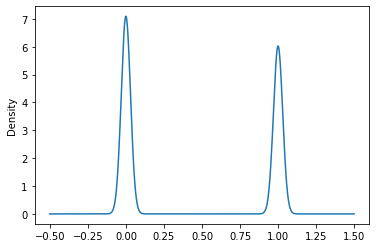

In [23]:
training_set.skip_1.plot(kind='kde')

In [24]:
training_set.groupby("track_id_clean")["skip_1"].mean()

track_id_clean
t_00003dab-aa2d-4102-b563-b3ca5459d32d    0.000000
t_0000496c-869f-4350-83f1-bd1c14ea79ba    0.333333
t_0000dc06-0c00-4a09-9dc6-3bdad9c6f0e8    0.500000
t_0000fc15-edfc-4026-a817-4b7bce555990    0.000000
t_00010c8e-6bfc-42a2-ae75-f617dd153aa0    0.500000
                                            ...   
t_fffdaa5f-0988-42c6-ab3c-46f28fe0c206    0.000000
t_fffdc5a9-237e-4862-983e-958e51964583    0.600000
t_fffe4528-f29c-467c-a751-e9db03964faa    0.463768
t_ffff80a4-420a-417f-96a4-4bdaf88a1eb3    0.000000
t_ffffd2a0-4940-4ec2-9329-2854f170ea2a    0.400000
Name: skip_1, Length: 198551, dtype: float64

In [25]:
total_skip_occurance=training_set.groupby("track_id_clean")["skip_1"].sum()

In [26]:
total_occurance=training_set.groupby("track_id_clean")["skip_1"].count()

In [27]:
skip_rate=total_skip_occurance/total_occurance

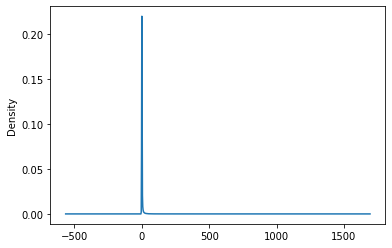

In [28]:
total_skip_occurance.plot(kind='kde')

In [29]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


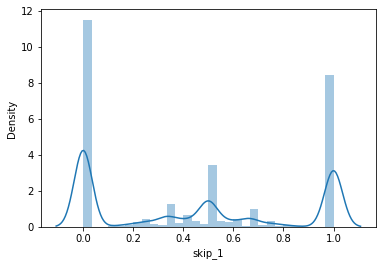

In [30]:
sns.distplot(skip_rate)

In [31]:
skip_df=pd.DataFrame(skip_rate)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


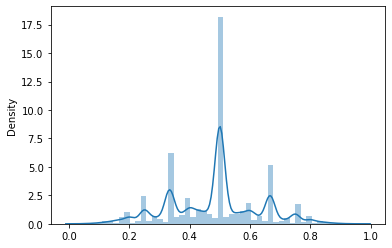

In [32]:
sns.distplot(skip_df[(skip_df["skip_1"]>0) & (skip_df["skip_1"]<1)])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


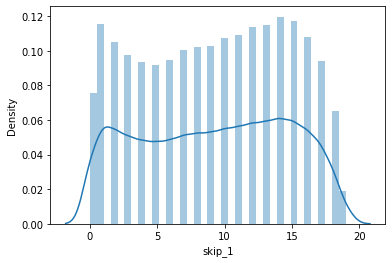

In [33]:
sns.distplot(training_set.groupby("session_id")["skip_1"].sum())

In [34]:
(training_set.groupby("session_id")["skip_1"].count()!=20).sum()

0

In [35]:
track_df=pd.DataFrame(training_set.groupby("track_id_clean")["skip_1"].count().sort_values())

In [36]:
track_df

,skip_1
track_id_clean,
t_00003dab-aa2d-4102-b563-b3ca5459d32d,1
t_9148c7cc-8217-4e28-b9c4-a9a865bd435b,1
t_9148716b-054e-4d61-8821-39cd5662b36d,1
t_9148505a-8689-4750-a808-3c85cf30b18a,1
t_914809b3-05a1-482e-8bcc-157ee78059ea,1
...,...
t_bacf06d3-9185-4183-84ea-ff0db51475ce,2279
t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,2338
t_62992ca5-a5d3-4c76-9172-54f4c1a952a5,2528


In [37]:
avg_skip_postion=training_set.groupby("session_position")["skip_1"].mean()

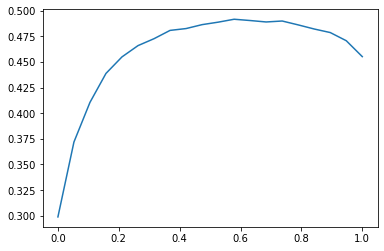

In [38]:
plt.plot(avg_skip_postion)

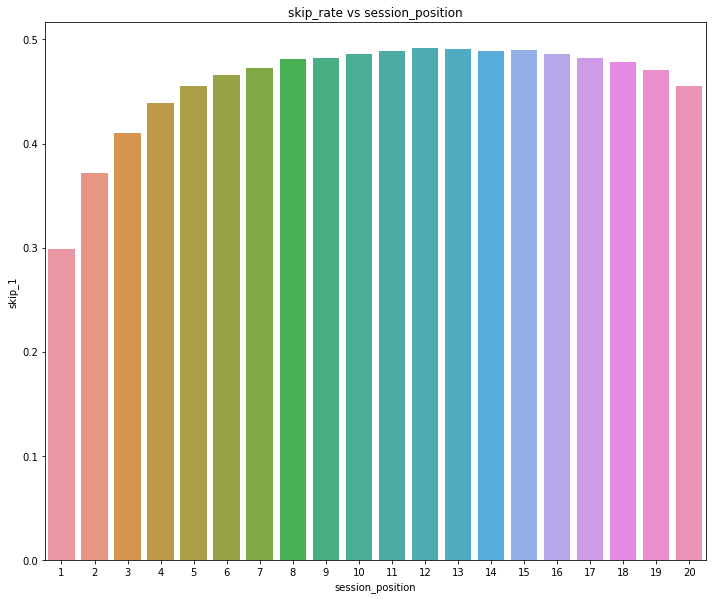

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(x=[i for i in range(1,21)],y=avg_skip_postion)
plt.tight_layout()
plt.title("skip_rate vs session_position")
plt.xlabel("session_position")
plt.show()

In [40]:
training_set.session_id=training_set.session_id.astype("category")

In [41]:
session_id_to_code=training_set.session_id.cat.categories.values

In [42]:
training_set.session_id=training_set.session_id.cat.codes

In [43]:
training_set.shape

(1181560, 40)

In [44]:
train_df=training_set.merge(track_features,left_on='track_id_clean', right_on='track_id',suffixes=('_left', '_right'))

In [45]:
(train_df["track_id"]!=train_df["track_id_clean"]).sum()

0

In [46]:
train_df.drop("track_id_clean",inplace=True,axis=1)

In [47]:
train_df.head()

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,is_major,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0,0.000000,1.0,1,1,1,0,0,0,0,0,-0.164915,-0.165319,0,0.608696,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,t_1a73002a-d065-4a33-b98a-a3b0443310be,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,0.901467,2.076821,0.522463,1.040777,7.197583e-08,0.181818,0.259353,-0.060035,0.5,1,0.353645,0.330443,-0.562429,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306
1,0,0.052632,1.0,0,0,0,0,0,0,0,1,4.621190,-0.165319,0,0.608696,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,t_1a73002a-d065-4a33-b98a-a3b0443310be,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,0.901467,2.076821,0.522463,1.040777,7.197583e-08,0.181818,0.259353,-0.060035,0.5,1,0.353645,0.330443,-0.562429,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306
2,2,0.210526,1.0,0,0,0,1,1,1,0,0,-0.164915,-0.165319,0,0.652174,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,t_1a73002a-d065-4a33-b98a-a3b0443310be,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,0.901467,2.076821,0.522463,1.040777,7.197583e-08,0.181818,0.259353,-0.060035,0.5,1,0.353645,0.330443,-0.562429,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306
3,49,0.052632,1.0,1,1,1,0,0,1,0,0,-0.164915,-0.165319,0,0.000000,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,t_1a73002a-d065-4a33-b98a-a3b0443310be,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,0.901467,2.076821,0.522463,1.040777,7.197583e-08,0.181818,0.259353,-0.060035,0.5,1,0.353645,0.330443,-0.562429,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306
4,49,0.105263,1.0,0,0,0,0,0,0,1,1,-0.164915,-0.165319,0,0.000000,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,t_1a73002a-d065-4a33-b98a-a3b0443310be,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,0.901467,2.076821,0.522463,1.040777,7.197583e-08,0.181818,0.259353,-0.060035,0.5,1,0.353645,0.330443,-0.562429,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306


In [48]:
train_df.set_index("track_id",inplace=True)

In [49]:
train_df.head()

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,is_major,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
t_1a73002a-d065-4a33-b98a-a3b0443310be,0,0.000000,1.0,1,1,1,0,0,0,0,0,-0.164915,-0.165319,0,0.608696,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,0.901467,2.076821,0.522463,1.040777,7.197583e-08,0.181818,0.259353,-0.060035,0.5,1,0.353645,0.330443,-0.562429,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306
t_1a73002a-d065-4a33-b98a-a3b0443310be,0,0.052632,1.0,0,0,0,0,0,0,0,1,4.621190,-0.165319,0,0.608696,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,0.901467,2.076821,0.522463,1.040777,7.197583e-08,0.181818,0.259353,-0.060035,0.5,1,0.353645,0.330443,-0.562429,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306
t_1a73002a-d065-4a33-b98a-a3b0443310be,2,0.210526,1.0,0,0,0,1,1,1,0,0,-0.164915,-0.165319,0,0.652174,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,0.901467,2.076821,0.522463,1.040777,7.197583e-08,0.181818,0.259353,-0.060035,0.5,1,0.353645,0.330443,-0.562429,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306
t_1a73002a-d065-4a33-b98a-a3b0443310be,49,0.052632,1.0,1,1,1,0,0,1,0,0,-0.164915,-0.165319,0,0.000000,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,0.901467,2.076821,0.522463,1.040777,7.197583e-08,0.181818,0.259353,-0.060035,0.5,1,0.353645,0.330443,-0.562429,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306
t_1a73002a-d065-4a33-b98a-a3b0443310be,49,0.105263,1.0,0,0,0,0,0,0,1,1,-0.164915,-0.165319,0,0.000000,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,0.901467,2.076821,0.522463,1.040777,7.197583e-08,0.181818,0.259353,-0.060035,0.5,1,0.353645,0.330443,-0.562429,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306


In [50]:
train_df.reset_index(inplace=True)

In [51]:
train_df["track_id"]=train_df["track_id"].astype("category")

In [52]:
track_id_to_code=train_df["track_id"].cat.categories.values

In [53]:
train_df["track_id"]=train_df["track_id"].cat.codes

In [54]:
train_df.set_index("track_id",inplace=True)
train_df.head()

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,is_major,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20644,0,0.000000,1.0,1,1,1,0,0,0,0,0,-0.164915,-0.165319,0,0.608696,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,0.901467,2.076821,0.522463,1.040777,7.197583e-08,0.181818,0.259353,-0.060035,0.5,1,0.353645,0.330443,-0.562429,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306
20644,0,0.052632,1.0,0,0,0,0,0,0,0,1,4.621190,-0.165319,0,0.608696,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,0.901467,2.076821,0.522463,1.040777,7.197583e-08,0.181818,0.259353,-0.060035,0.5,1,0.353645,0.330443,-0.562429,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306
20644,2,0.210526,1.0,0,0,0,1,1,1,0,0,-0.164915,-0.165319,0,0.652174,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,0.901467,2.076821,0.522463,1.040777,7.197583e-08,0.181818,0.259353,-0.060035,0.5,1,0.353645,0.330443,-0.562429,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306
20644,49,0.052632,1.0,1,1,1,0,0,1,0,0,-0.164915,-0.165319,0,0.000000,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,0.901467,2.076821,0.522463,1.040777,7.197583e-08,0.181818,0.259353,-0.060035,0.5,1,0.353645,0.330443,-0.562429,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306
20644,49,0.105263,1.0,0,0,0,0,0,0,1,1,-0.164915,-0.165319,0,0.000000,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.163568,1.0,0.715581,0.011384,0.779074,0.836964,0.901467,2.076821,0.522463,1.040777,7.197583e-08,0.181818,0.259353,-0.060035,0.5,1,0.353645,0.330443,-0.562429,0.571429,0.328722,-1.577071,0.786764,0.806604,0.254515,-0.863171,0.077358,-0.904268,0.592306


In [55]:
train_df.sort_index(inplace=True)

In [56]:
df=train_df.drop(columns=['skip_1', 'skip_2','skip_3']).assign(skip_1=train_df['skip_1'], skip_2=train_df['skip_2'],skip_3=train_df["skip_3"])

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [58]:
df1=df.drop(columns=['not_skipped']).assign(not_skipped=df['not_skipped'])

In [59]:
df1.head()

,session_id,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,is_major,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skip_1,skip_2,skip_3,not_skipped
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,23822,0.736842,1.0,0,1,0,0,-0.164915,-0.165319,1,0.000000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.395518,0.470588,0.641273,0.150386,0.702139,0.704185,0.640116,0.715487,0.255723,1.013611,1.450515e-07,0.636364,0.052166,-2.168737,0.181208,1,0.588658,0.039726,-1.205813,0.571429,0.837421,0.780346,-1.089080,-1.424455,-0.051026,1.758553,-0.367772,-0.363727,-0.806559,0,1,1,0
1,43899,0.157895,1.0,0,1,0,0,-0.164915,-0.165319,0,0.347826,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-1.285788,0.941176,0.663269,0.326604,0.590013,0.603530,0.634080,0.296188,0.939538,0.931324,1.678981e-08,0.909091,0.125130,0.471912,0.842657,0,0.256346,0.132457,1.953061,0.571429,0.645354,-0.203916,0.103302,-0.662406,0.127842,-0.063485,-0.452487,-0.131438,-0.233034,0,0,0,1
1,16591,0.736842,1.0,0,0,1,1,-0.164915,-0.165319,0,0.739130,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,-1.285788,0.941176,0.663269,0.326604,0.590013,0.603530,0.634080,0.296188,0.939538,0.931324,1.678981e-08,0.909091,0.125130,0.471912,0.842657,0,0.256346,0.132457,1.953061,0.571429,0.645354,-0.203916,0.103302,-0.662406,0.127842,-0.063485,-0.452487,-0.131438,-0.233034,0,1,1,0
1,13603,0.000000,1.0,0,0,0,0,-0.164915,-0.165319,1,0.826087,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.285788,0.941176,0.663269,0.326604,0.590013,0.603530,0.634080,0.296188,0.939538,0.931324,1.678981e-08,0.909091,0.125130,0.471912,0.842657,0,0.256346,0.132457,1.953061,0.571429,0.645354,-0.203916,0.103302,-0.662406,0.127842,-0.063485,-0.452487,-0.131438,-0.233034,1,1,1,0
2,5417,0.368421,1.0,0,0,1,1,-0.164915,-0.165319,0,0.043478,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1.951820,0.985294,0.650254,0.799764,0.451846,0.624529,0.599989,1.005539,0.247700,1.014247,9.038057e-09,0.000000,0.084507,-1.492407,0.106164,0,0.848105,0.259688,-0.303097,0.571429,0.173189,-0.531965,0.017547,-0.602462,-0.054269,-0.311670,-0.978050,-1.032744,-0.340063,0,0,0,1


In [60]:
df1.reset_index(inplace=True)

In [61]:
X = df1.iloc[:,0:-4]  #independent columns
y = df1.iloc[:,-4:-1]

[8.4200161e-05 0.0000000e+00 1.5479843e-03 0.0000000e+00 5.4595685e-03
 2.1008603e-02 9.3181530e-04 0.0000000e+00 7.1587320e-03 2.0477479e-02
 7.2707783e-04 1.1797335e-04 3.3590584e-03 1.3432781e-03 0.0000000e+00
 0.0000000e+00 3.5274976e-03 1.1034278e-03 8.6534778e-03 7.4493891e-04
 4.1874982e-03 4.5008236e-03 0.0000000e+00 2.6577448e-02 0.0000000e+00
 0.0000000e+00 2.5155771e-01 0.0000000e+00 0.0000000e+00 3.3960599e-02
 0.0000000e+00 8.2870468e-02 1.0427191e-02 3.4895290e-03 2.3691214e-03
 4.9689484e-01 1.4691709e-03 1.1707831e-03 8.5644989e-04 0.0000000e+00
 2.7367362e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3178727e-04
 1.1502535e-04 2.5592351e-04 0.0000000e+00 0.0000000e+00 9.5235722e-05
 2.6050775e-04 0.0000000e+00 1.8532206e-04 2.0888542e-04 2.5666776e-04
 0.0000000e+00 0.0000000e+00 3.7565976e-04 7.3588098e-04 1.4236668e-04
 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.8637879e-04 0.0000000e+00]


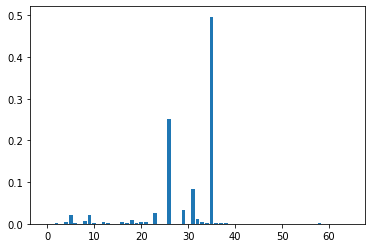

In [62]:
from xgboost import XGBClassifier
#import matplotlib.pyplot as plt
model = XGBClassifier()
model.fit(X,y["skip_1"].values)

feature_importance=model.feature_importances_
# feature importance
print(feature_importance)
# plot
plt.bar(range(len(feature_importance)), feature_importance)
plt.show()

In [63]:
sorted_importance=pd.Series(feature_importance,index=X.columns).sort_values(ascending=False)

In [64]:
top40=sorted_importance[:40].index.tolist()

In [65]:
top40.insert(0,"track_id")

In [66]:
X_new=X.loc[:,top40]

In [67]:
model.fit(X_new,y["skip_1"].values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

[9.0905611e-05 2.1989510e-04 1.7739937e-03 0.0000000e+00 1.6071501e-03
 2.3881074e-02 5.1837671e-03 2.8126386e-03 1.9378968e-03 7.2603584e-03
 2.4155055e-03 0.0000000e+00 2.0904180e-03 1.1971364e-03 0.0000000e+00
 0.0000000e+00 3.0928024e-03 1.2869514e-03 1.4175489e-03 5.3706253e-04
 6.6380575e-03 1.6115071e-02 0.0000000e+00 2.6128558e-02 0.0000000e+00
 0.0000000e+00 1.0846850e-01 0.0000000e+00 0.0000000e+00 2.3539808e-02
 0.0000000e+00 2.8510595e-02 2.4148994e-03 3.2615347e-03 1.1537023e-03
 7.1399826e-01 2.6751752e-03 2.1045394e-03 4.1729352e-04 0.0000000e+00
 0.0000000e+00 3.1213943e-04 2.3371037e-04 0.0000000e+00 2.1038146e-04
 6.0619070e-04 2.0056580e-04 0.0000000e+00 3.0414757e-04 0.0000000e+00
 7.4524118e-04 0.0000000e+00 1.7887777e-04 4.0512832e-04 0.0000000e+00
 0.0000000e+00 1.1648759e-04 5.0295802e-04 6.2580215e-04 0.0000000e+00
 0.0000000e+00 2.9538100e-04 8.7094965e-04 2.6084486e-04 1.9001340e-03]


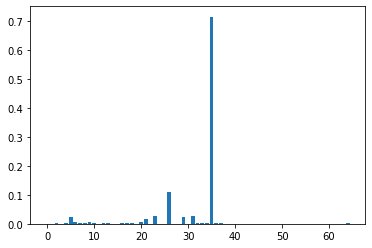

In [68]:
model2=XGBClassifier()
model2.fit(X,y["skip_2"].values)

feature_importance2=model2.feature_importances_
# feature importance
print(feature_importance2)
# plot
plt.bar(range(len(feature_importance2)), feature_importance2)
plt.show()

In [69]:
sorted_importance2=pd.Series(feature_importance2,index=X.columns).sort_values(ascending=False)

In [70]:
top402=sorted_importance2[:40].index.tolist()

In [71]:
top402.insert(0,"track_id")

In [72]:
X_new2=X.loc[:,top402]

In [73]:
model2.fit(X_new2,y["skip_2"].values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

[0.0000000e+00 0.0000000e+00 1.0226858e-03 0.0000000e+00 5.3031457e-04
 1.4454478e-03 1.1761786e-03 4.1441660e-04 1.1385481e-02 3.8340124e-03
 8.9150650e-04 5.4548764e-05 1.0217171e-03 8.3045906e-04 1.6998596e-04
 5.2399846e-04 0.0000000e+00 8.2828652e-04 7.4193731e-04 3.9163165e-04
 5.1430881e-04 1.6196604e-03 0.0000000e+00 6.4846901e-03 0.0000000e+00
 0.0000000e+00 9.7141939e-04 0.0000000e+00 0.0000000e+00 3.6485114e-03
 0.0000000e+00 2.0058041e-03 1.1614221e-03 0.0000000e+00 0.0000000e+00
 9.5345861e-01 1.0105292e-03 3.9286338e-04 5.4439687e-04 0.0000000e+00
 0.0000000e+00 1.6309028e-04 3.4245171e-04 0.0000000e+00 1.4673716e-04
 0.0000000e+00 2.3826231e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00
 2.3752268e-04 0.0000000e+00 0.0000000e+00 2.0132173e-04 0.0000000e+00
 0.0000000e+00 0.0000000e+00 2.8412230e-04 0.0000000e+00 3.1950339e-04
 2.1629920e-04 3.4817401e-04 1.6037244e-04 1.4248722e-04 1.2488042e-04]


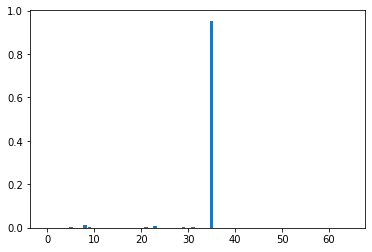

In [74]:
model3=XGBClassifier()
model3.fit(X,y["skip_3"].values)

feature_importance3=model3.feature_importances_
# feature importance
print(feature_importance3)
# plot
plt.bar(range(len(feature_importance3)), feature_importance3)
plt.show()

In [75]:
sorted_importance3=pd.Series(feature_importance3,index=X.columns).sort_values(ascending=False)

In [76]:
top403=sorted_importance3[:40].index.tolist()

In [77]:
top403.insert(0,"track_id")

In [78]:
X_new3=X.loc[:,top403]

In [ ]:
model3.fit(X_new2,y["skip_3"].values)

In [ ]:
model4=XGBClassifier()
model4.fit(X,df1["not_skipped"].values)

feature_importance4=model4.feature_importances_
# feature importance
print(feature_importance4)
# plot
plt.bar(range(len(feature_importance4)), feature_importance4)
plt.show()

In [ ]:
sorted_importance4=pd.Series(feature_importance4,index=X.columns).sort_values(ascending=False)

In [ ]:
si=sorted_importance4[:40].index.tolist()

In [ ]:
si.remove("track_id")
top404=si
top404.insert(0,"track_id")

In [ ]:
X_new4=X.loc[:,top404]

In [ ]:
model4.fit(X_new4,df1["not_skipped"].values)

In [ ]:
test_df_copy=test_df.copy()

In [ ]:
from sklearn.metrics import classification_report
skip_1_pred=model.predict(new_test.loc[:,top40])
print("model_skip_1")
print(classification_report(new_test.iloc[:,-4].values, skip_1_pred))
skip_2_pred=model.predict(new_test.loc[:,top402])
print("model_skip_2")
print(classification_report(new_test.iloc[:,-3].values, skip_2_pred))
skip_3_pred=model.predict(new_test.loc[:,top403])
print("model_skip_3")
print(classification_report(new_test.iloc[:,-2].values, skip_3_pred))
not_skipped_pred=model.predict(new_test.loc[:,top404])
print("model_not_skipped")
print(classification_report(new_test.iloc[:,-1].values, not_skipped_pred))